In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
%matplotlib inline

[2.13598654 2.06500462]


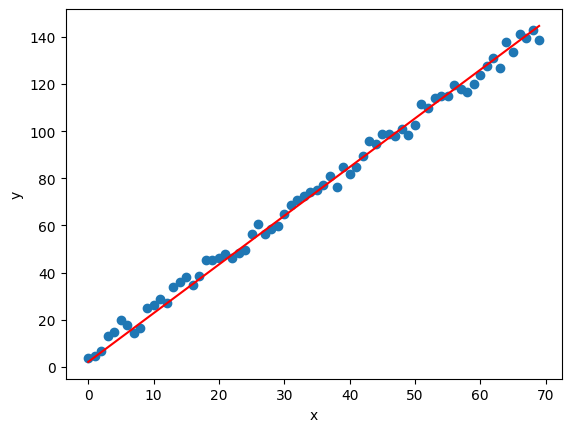

In [18]:
class Linear_Regression:
    def __init__(self, X, Y):
        self.X = np.insert(X, 0, [1] * X.shape[0], axis=1)
        self.Y = Y
        self.b = np.zeros((self.X[0].shape[0]))

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        p = len(Y)

        sum = np.zeros((len(self.b)))
        for i, x in enumerate(self.X):
            for coef in range(len(x)):
                sum[coef] += (2 / p) * (np.array(Y_pred)[i] - Y[i]) * x[coef]
        self.b -= learning_rate * sum

    # self.b[coef] - (learning_rate *
    def predict(self, X=None):
        Y_pred = []
        if X is None:
            X = self.X
        else:
            X = np.insert(X, 0, [1] * X.shape[0], axis=1)
        b = self.b
        for i in range(X.shape[0]):
            pred_value = np.dot(np.array(b).T, np.array(X[i]))
            Y_pred.append(pred_value)

        return Y_pred

    def compute_cost(self, Y_pred):
        p = len(self.Y)
        return (1 / p) * (np.sum(np.array(Y_pred) - np.array(self.Y)) ** 2)


Xs = np.array([[x] for x in range(100)])
Ys = np.array([x * 2 + random.random() * 10 for x in Xs])
# print(f'Points are:{Xs}')
# print(f'Ys are:{Ys}')
regressor = Linear_Regression(Xs[:70], Ys[:70])

iterations = 0
steps = 10000
learning_rate = 0.0001
costs = []

while iterations < steps:
    Y_pred = regressor.predict()
    cost = regressor.compute_cost(Y_pred)
    costs.append(cost)
    regressor.update_coeffs(learning_rate)
    iterations += 1
print(regressor.b)

predictions = regressor.predict(X=Xs[:70])

plt.scatter(Xs[:70], Ys[:70])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(Xs[:70], predictions, color='r')

[5.36099374 1.98405731]


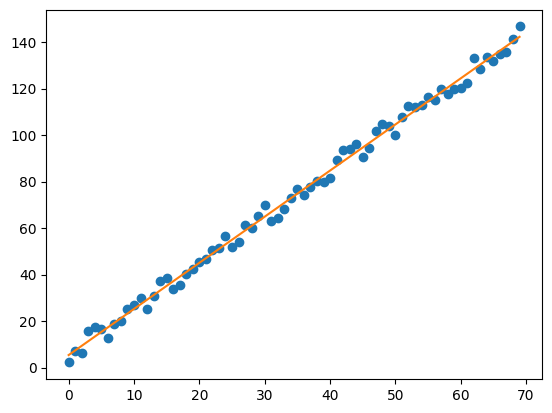

In [15]:
x = sm.add_constant(Xs[:70].reshape(Xs[:70].shape[0]).T)
coefs = (np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, Ys[:70].reshape(Ys[:70].shape[0]).T)))
plt.plot(Xs[:70].reshape(Xs[:70].shape[0]).T,Ys[:70].reshape(Ys[:70].shape[0]).T,'o')
plt.plot(Xs[:70], coefs[0] + coefs[1]*Xs[:70])
print(coefs)

[[1.99727393]]
[5.27367396]


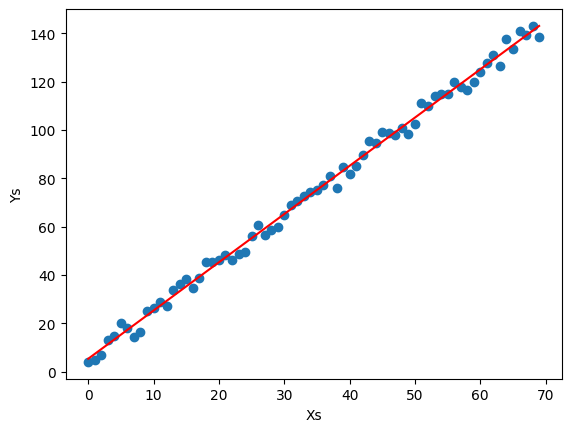

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xs[:70],Ys[:70])
predictions=model.predict(Xs[:70])
print(model.coef_)
print(model.intercept_)
plt.xlabel('Xs')
plt.ylabel('Ys')
plt.scatter(Xs[:70],Ys[:70])
plt.plot(Xs[:70],predictions,color = 'r')